In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [2]:
wine = datasets.load_wine()
X = wine.data[:, :2]

In [3]:


n_components = 2  # Number of clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']

In [4]:
gmm_models = {cov_type: GaussianMixture(n_components=n_components, covariance_type=cov_type)
              for cov_type in covariance_types}

for cov_type, gmm_model in gmm_models.items():
    gmm_model.fit(X)

In [5]:
covariances = {cov_type: gmm_model.covariances_
               for cov_type, gmm_model in gmm_models.items()}

In [6]:
predictions = {cov_type: gmm_model.predict(X)
               for cov_type, gmm_model in gmm_models.items()}

Covariance Matrix (full - Component):
[[0.65948436 0.14308131]
 [0.14308131 0.08977394]]
Covariance Matrix (tied - Component):
[0.65472811 0.06104194]
Covariance Matrix (diag - Component):
[0.77474996 0.13054888]
Covariance Matrix (spherical - Component):
0.5256555694953017


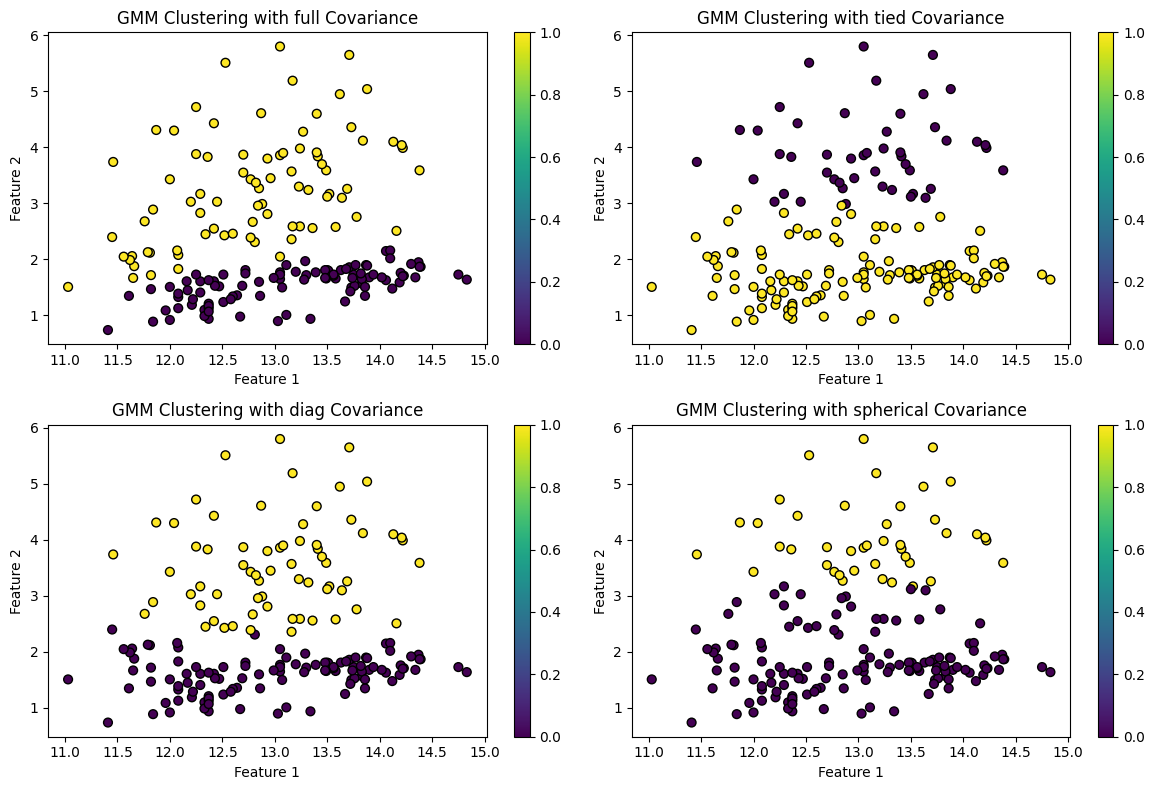

In [7]:
plt.figure(figsize=(12, 8))

for i, (cov_type, gmm_model) in enumerate(gmm_models.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=predictions[cov_type], cmap='viridis', edgecolors='k', s=40)
    plt.title(f'GMM Clustering with {cov_type} Covariance')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()

    print(f'Covariance Matrix ({cov_type} - Component):\n{covariances[cov_type][0]}')

plt.tight_layout()
plt.show()